In [1]:
import pickle
with open("train_data.txt", "rb") as myFile:
    data = pickle.load(myFile)


In [2]:
header=data[0]
data=data[1:]


In [3]:
x_values=[w[0] for w in data]
y_values=[w[1] for w in data]
#z_values=[w[2] for w in data[1:]]

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

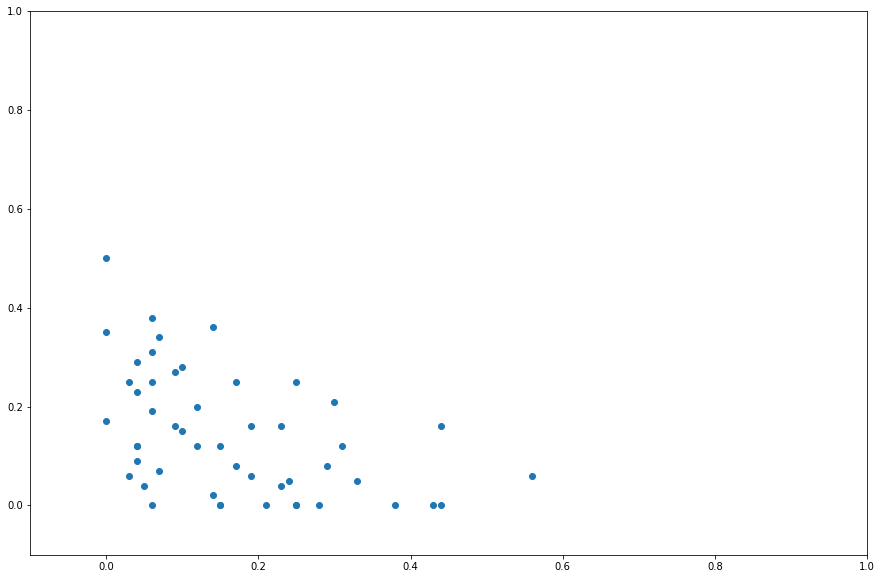

In [5]:
fig = plt.figure(figsize=(15,10))
#ax = fig
plt.xlim(-0.1,  1)
plt.ylim(-0.1, 1)
plt.scatter(x_values, y_values)

In [6]:
%matplotlib inline

data

[(0.38, 0.0),
 (0.05, 0.04),
 (0.04, 0.23),
 (0.06, 0.0),
 (0.09, 0.16),
 (0.09, 0.27),
 (0.04, 0.12),
 (0.14, 0.02),
 (0.0, 0.5),
 (0.33, 0.05),
 (0.25, 0.0),
 (0.43, 0.0),
 (0.06, 0.19),
 (0.21, 0.0),
 (0.0, 0.17),
 (0.04, 0.29),
 (0.19, 0.06),
 (0.25, 0.25),
 (0.23, 0.16),
 (0.44, 0.16),
 (0.12, 0.2),
 (0.1, 0.15),
 (0.06, 0.38),
 (0.15, 0.12),
 (0.07, 0.07),
 (0.06, 0.25),
 (0.1, 0.28),
 (0.04, 0.09),
 (0.44, 0.0),
 (0.24, 0.05),
 (0.04, 0.12),
 (0.12, 0.12),
 (0.15, 0.0),
 (0.15, 0.0),
 (0.17, 0.25),
 (0.56, 0.06),
 (0.25, 0.0),
 (0.07, 0.34),
 (0.06, 0.31),
 (0.17, 0.08),
 (0.14, 0.36),
 (0.19, 0.16),
 (0.31, 0.12),
 (0.03, 0.06),
 (0.3, 0.21),
 (0.28, 0.0),
 (0.29, 0.08),
 (0.03, 0.25),
 (0.23, 0.04),
 (0.0, 0.35)]

In [7]:
from modules import *
#from random import randint
k=3
c=[data[11],data[2],data[3]]
c_new=[]
clusters=[]    
for i in range(k):
    #c.append(None)
    c_new.append(None)
    #c[i]=data[i]
    clusters.append([])
print(c)
iteration=1
while(True):
    print("\n",iteration,":")
    for i in range(len(data)):
        pos=None
        min_dist=9999
        for j in range(k):
            dist=distance(2,c[j],data[i])
            if dist<min_dist:
                min_dist=dist
                pos=j
        clusters[pos].append(i+1)
    flag=0
    for i in range(k):
        c_new[i]=centroid(clusters[i],data)
        print(c_new[i],c[i])
        if( all(j == k for j, k in zip(c_new[i],c[i])))== False:
            flag=1
    print (clusters)
    if flag==0:
        break
    else:
        for i in range(k):
            clusters[i]=[]
            c[i]=c_new[i]

    iteration+=1
    if iteration==10:
        break



    

[(0.43, 0.0), (0.04, 0.23), (0.06, 0.0)]

 1 :
(0.355, 0.056666666666666664) (0.43, 0.0)
(0.08608695652173914, 0.24956521739130433) (0.04, 0.23)
(0.13333333333333333, 0.05) (0.06, 0.0)
[[1, 10, 11, 12, 20, 29, 36, 37, 43, 45, 46, 47], [3, 5, 6, 7, 9, 13, 15, 16, 18, 19, 21, 22, 23, 26, 27, 31, 35, 38, 39, 41, 42, 48, 50], [2, 4, 8, 14, 17, 24, 25, 28, 30, 32, 33, 34, 40, 44, 49]]

 2 :
(0.355, 0.056666666666666664) (0.355, 0.056666666666666664)
(0.07789473684210528, 0.2726315789473684) (0.08608695652173914, 0.24956521739130433)
(0.13157894736842102, 0.06894736842105263) (0.13333333333333333, 0.05)
[[1, 10, 11, 12, 20, 29, 36, 37, 43, 45, 46, 47], [3, 5, 6, 9, 13, 15, 16, 18, 21, 22, 23, 26, 27, 35, 38, 39, 41, 48, 50], [2, 4, 7, 8, 14, 17, 19, 24, 25, 28, 30, 31, 32, 33, 34, 40, 42, 44, 49]]

 3 :
(0.355, 0.056666666666666664) (0.355, 0.056666666666666664)
(0.07588235294117648, 0.2864705882352941) (0.07789473684210528, 0.2726315789473684)
(0.12809523809523807, 0.07714285714285715) (0.1

1 0.38 0.0 GREEN
10 0.33 0.05 GREEN
11 0.25 0.0 GREEN
12 0.43 0.0 GREEN
20 0.44 0.16 GREEN
29 0.44 0.0 GREEN
36 0.56 0.06 GREEN
37 0.25 0.0 GREEN
43 0.31 0.12 GREEN
45 0.3 0.21 GREEN
46 0.28 0.0 GREEN
47 0.29 0.08 GREEN
3 0.04 0.23 RED
6 0.09 0.27 RED
9 0.0 0.5 RED
13 0.06 0.19 RED
15 0.0 0.17 RED
16 0.04 0.29 RED
18 0.25 0.25 RED
21 0.12 0.2 RED
23 0.06 0.38 RED
26 0.06 0.25 RED
27 0.1 0.28 RED
35 0.17 0.25 RED
38 0.07 0.34 RED
39 0.06 0.31 RED
41 0.14 0.36 RED
48 0.03 0.25 RED
50 0.0 0.35 RED
2 0.05 0.04 BLUE
4 0.06 0.0 BLUE
5 0.09 0.16 BLUE
7 0.04 0.12 BLUE
8 0.14 0.02 BLUE
14 0.21 0.0 BLUE
17 0.19 0.06 BLUE
19 0.23 0.16 BLUE
22 0.1 0.15 BLUE
24 0.15 0.12 BLUE
25 0.07 0.07 BLUE
28 0.04 0.09 BLUE
30 0.24 0.05 BLUE
31 0.04 0.12 BLUE
32 0.12 0.12 BLUE
33 0.15 0.0 BLUE
34 0.15 0.0 BLUE
40 0.17 0.08 BLUE
42 0.19 0.16 BLUE
44 0.03 0.06 BLUE
49 0.23 0.04 BLUE


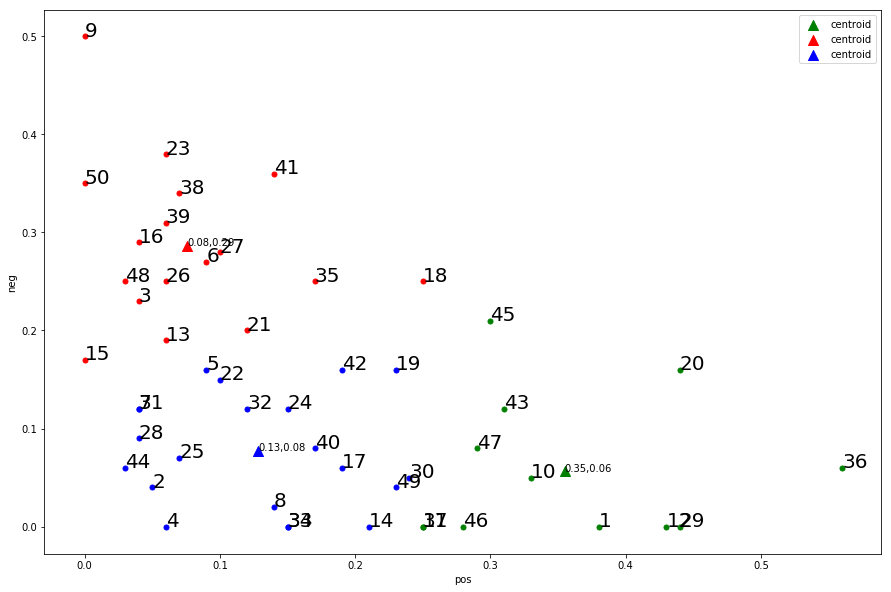

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
colors=["GREEN", "RED", "BLUE"]
fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    #colors.append("%03x" % random.randint(0, 0xFFF))
    plt.scatter(c[i][0],c[i][1],marker="^",label="centroid",color=colors[i],s=100)
    plt.text(c[i][0],c[i][1],'%s,%s'%(round(c[i][0],2),round(c[i][1],2)),size=10)
    for j in clusters[i]:
        print(j,data[j-1][0],data[j-1][1],colors[i])
        
        plt.scatter(data[j-1][0],data[j-1][1],color=colors[i],s=25)
        plt.text(data[j-1][0],data[j-1][1],  '%s' % (str(j)), size=20, zorder=1)
plt.xlabel('pos')
plt.ylabel('neg')
plt.legend()
plt.show()


In [17]:
test_set={}
train_set={}

import csv
def reassign(i,cluster_class):
    for j in clusters[i]:
        train_set[j]=cluster_class
def label_clusters():
    accuracy=0
    
    
    with open("kmeans_test.csv") as csv_file:
        reader=csv.reader(csv_file)
        next(reader)
        for row in reader:
            print (row[0],row[2])
            test_set[int(row[0])]=row[2]
   
    g_count=b_count=n_count=0
    
    for i in range(k):
        for j in clusters[i]:
            print(j)
            if j in test_set:
                if test_set[j]=='g':
                    g_count+=1
                elif test_set[j]=='b':
                    b_count+=1
                elif test_set[j]=='n':
                    n_count+=1
        if(g_count== max(g_count,b_count,n_count)):
            reassign(i,'g')
        if(b_count== max(g_count,b_count,n_count)):
            reassign(i,'b')
       
        if(n_count== max(g_count,b_count,n_count)):
            reassign(i,'n')
                    
            
    
    print(test_set)    
    print(train_set)

label_clusters()

1 g
2 g
3 n
4 n
5 g
6 b
7 b
8 g
9 b
10 n
1
10
11
12
20
29
36
37
43
45
46
47
3
6
9
13
15
16
18
21
23
26
27
35
38
39
41
48
50
2
4
5
7
8
14
17
19
22
24
25
28
30
31
32
33
34
40
42
44
49
{1: 'g', 2: 'g', 3: 'n', 4: 'n', 5: 'g', 6: 'b', 7: 'b', 8: 'g', 9: 'b', 10: 'n'}
{1: 'n', 2: 'g', 3: 'n', 4: 'g', 5: 'g', 6: 'n', 7: 'g', 8: 'g', 9: 'n', 10: 'n', 11: 'n', 12: 'n', 13: 'n', 14: 'g', 15: 'n', 16: 'n', 17: 'g', 18: 'n', 19: 'g', 20: 'n', 21: 'n', 22: 'g', 23: 'n', 24: 'g', 25: 'g', 26: 'n', 27: 'n', 28: 'g', 29: 'n', 30: 'g', 31: 'g', 32: 'g', 33: 'g', 34: 'g', 35: 'n', 36: 'n', 37: 'n', 38: 'n', 39: 'n', 40: 'g', 41: 'n', 42: 'g', 43: 'n', 44: 'g', 45: 'n', 46: 'n', 47: 'n', 48: 'n', 49: 'g', 50: 'n'}


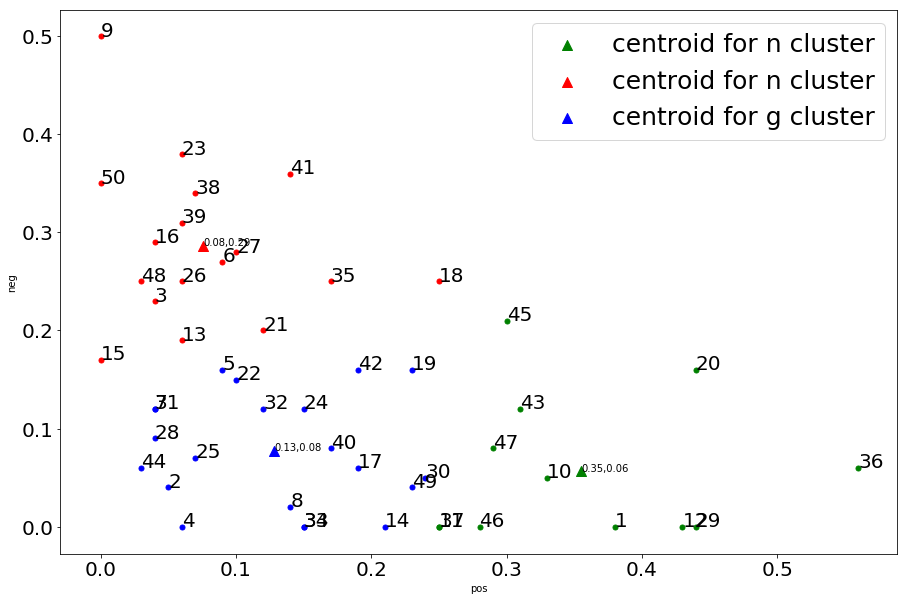

In [18]:
import matplotlib.pyplot as plt
import random
colors=["GREEN", "RED", "BLUE"]
fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(111, projection='3d')
plot = fig.add_subplot(111)

for i in range(k):
    num=clusters[i][0]
    
    #colors.append("%03x" % random.randint(0, 0xFFF))
    plt.scatter(c[i][0],c[i][1],marker="^",label="centroid for "+train_set[num]+" cluster",color=colors[i],s=100)
    plt.text(c[i][0],c[i][1],'%s,%s'%(round(c[i][0],2),round(c[i][1],2)),size=10)
    for j in clusters[i]:
        #print(j,data[j-1][0],data[j-1][1],colors[i])
        
        plt.scatter(data[j-1][0],data[j-1][1],color=colors[i],s=25)
        plt.text(data[j-1][0],data[j-1][1],  '%s' % (str(j)), size=20, zorder=1)
plt.xlabel('pos')
plt.ylabel('neg')
plt.setp(plot.get_xticklabels(), fontsize=20)
plt.setp(plot.get_yticklabels(), fontsize=20)
plt.legend(prop={'size': 25})
plt.show()

In [10]:
def accuracy():
    total=len(test_set)
    correct=0
    for i in train_set:
        if i in test_set and train_set[i]==test_set[i]:
            correct+=1
    print(float(correct/total)*100,'%')
accuracy()

70.0 %


In [11]:

headers=[header for header in header]
headers.append('class')
print(headers)
with open ("rulebase.csv","w") as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(headers)
    for i in train_set:
        row=[]
     
        for value in data[i-1]:
            row.append(value)
        row.append(train_set[i])
        writer.writerow(row)

['pos_score', 'neg_score', 'class']


In [12]:
def something():
    print("yes")